### Steve's simple lag and variable lag


#### Note
from darts.utils.timeseries_generation import (
    datetime_attribute_timeseries,
    sine_timeseries,
)

In [1]:
# fix python path if working locally
from utils import fix_pythonpath_if_working_locally

fix_pythonpath_if_working_locally()

import logging
import random
from typing import Tuple

import numpy as np
import torch
import pandas as pd
from icecream import ic

from darts import TimeSeries
from pytorch_lightning import seed_everything
import matplotlib.pyplot as plt


# for reproducibility
seed = 42
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(seed)
seed_everything(seed)

Seed set to 42


42

In [2]:
def simple_lag(n: int, lag: int) -> Tuple[np.ndarray, np.ndarray]:
    """
    Generates two time series with a specified lag.

    Parameters:
    n (int): The length of the time series.
    lag (int): The lag to apply to the second time series.

    Returns:
    tuple: A tuple containing two numpy arrays, p and q, where q is the lagged version of p.
    """
    N = n
    LAG = lag
    random_values = np.random.uniform(-1, 1, N - 1).astype(np.float32)
    p: np.ndarray = np.zeros(shape=N, dtype=np.float32)
    q: np.ndarray = np.zeros(shape=N, dtype=np.float32)

    for i in range(N - 1):
        p[i + 1] = random_values[i]

    for n in range(N - 1):
        if n + LAG < 0:
            q[n] = p[0]
        elif n + LAG >= N - 1:
            q[n] = p[n - 1]
        else:
            q[n] = p[n + LAG]
    return p, q


def plot_p_q(p: np.ndarray, q: np.ndarray, title: str = "") -> None:
    """
    Plots two time series.

    Parameters:
    p (numpy.ndarray): The first time series.
    q (numpy.ndarray): The second time series.
    title (str): The title of the plot (default is an empty string).

    Returns:
    None
    """
    plt.plot(p, label="p")
    plt.plot(q, label="q")
    plt.title(title)
    plt.legend()
    plt.show()

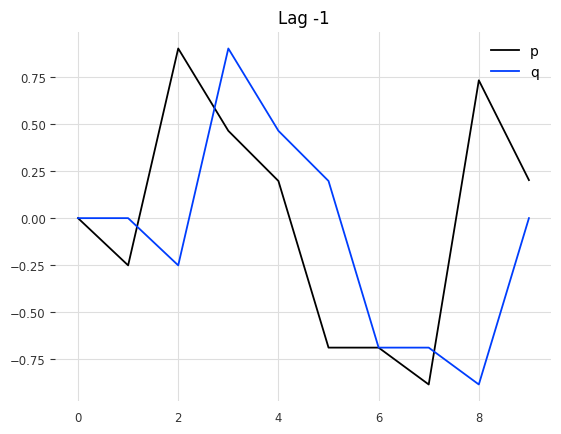

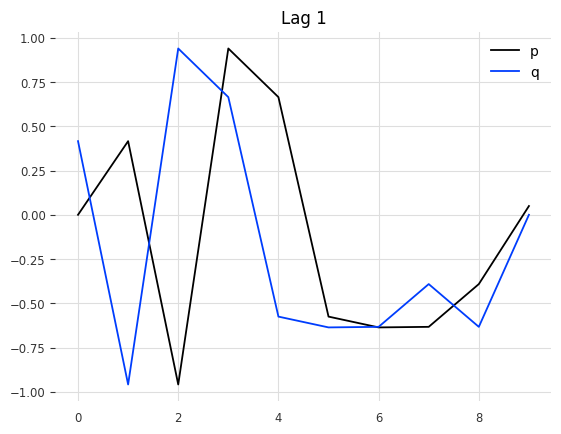

In [3]:
p, q = simple_lag(10, -1)
plot_p_q(p, q, title="Lag -1")

p, q = simple_lag(10, 1)
plot_p_q(p, q, title="Lag 1")

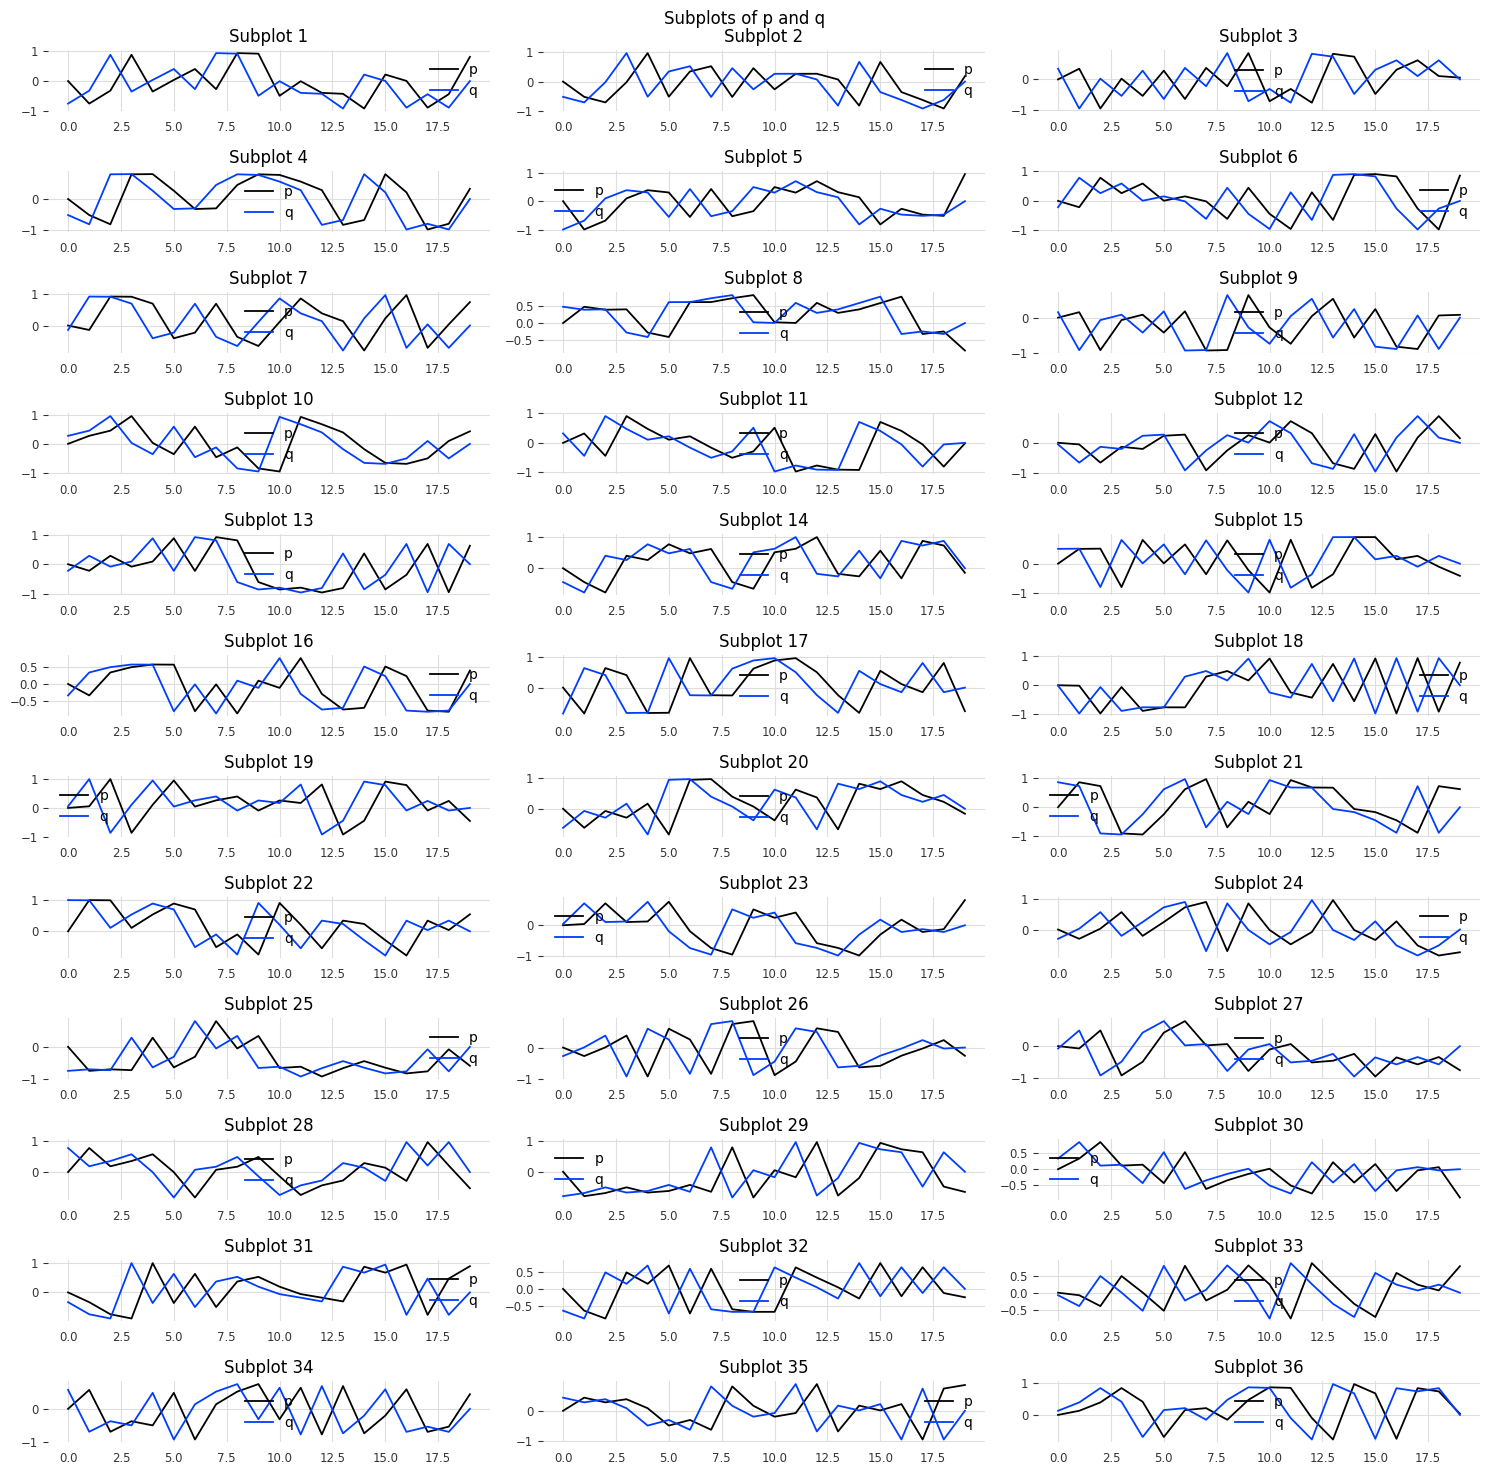

In [ ]:
series = []
covariates = []

fig, axes = plt.subplots(12, 3, figsize=(15, 15))
fig.suptitle('Subplots of p and q')

for i in range(36):
    p, q = simple_lag(n=20, lag=1)
    series.append(TimeSeries.from_values(p))
    covariates.append(TimeSeries.from_values(q))
    ax = axes[i // 3, i % 3]
    ax.plot(p, label="p")
    ax.plot(q, label="q")
    ax.set_title(f'Subplot {i+1}')
    ax.legend()

plt.tight_layout()
plt.show()
